## 1. Understanding the Problem and Objective:

## 2. Importing libraries and Loading the df:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
for dirname, _, filenames in os.walk('/mnt/c/Users/pc/Documents/github/kaggle_prep/LSR/df'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data_test = pd.read_csv('/mnt/c/Users/pc/Documents/github/kaggle_prep/LSR/data/test.csv', low_memory=False)
data = pd.read_csv('/mnt/c/Users/pc/Documents/github/kaggle_prep/LSR/data/train.csv', low_memory=False)

## 3. Checking the Structure of the dfset:

In [4]:
# data 확인

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [9]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [10]:
data.shape

(11504798, 12)

In [11]:
data_description = data.describe(include='all')
data_description

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,11504798,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,11504798,11504798,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,6228134,NaN,NaN,NaN,NaN,5982678,5783229,NaN,NaN,NaN,NaN
mean,5.752398e+06,NaN,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,NaN,NaN,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,NaN,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,NaN,NaN,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,NaN,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,NaN,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,NaN,NaN,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,NaN,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,NaN,NaN,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,NaN,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,NaN,NaN,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00


## 4. Checking the Duplicate and Missing Values in the df:

In [12]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape

(11504798, 12)

In [7]:
missing_values = data.isnull().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 5. Exploratory Data Analysis(EDA)

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Driving_License'}>],
       [<Axes: title={'center': 'Region_Code'}>,
        <Axes: title={'center': 'Previously_Insured'}>,
        <Axes: title={'center': 'Annual_Premium'}>],
       [<Axes: title={'center': 'Policy_Sales_Channel'}>,
        <Axes: title={'center': 'Vintage'}>,
        <Axes: title={'center': 'Response'}>]], dtype=object)

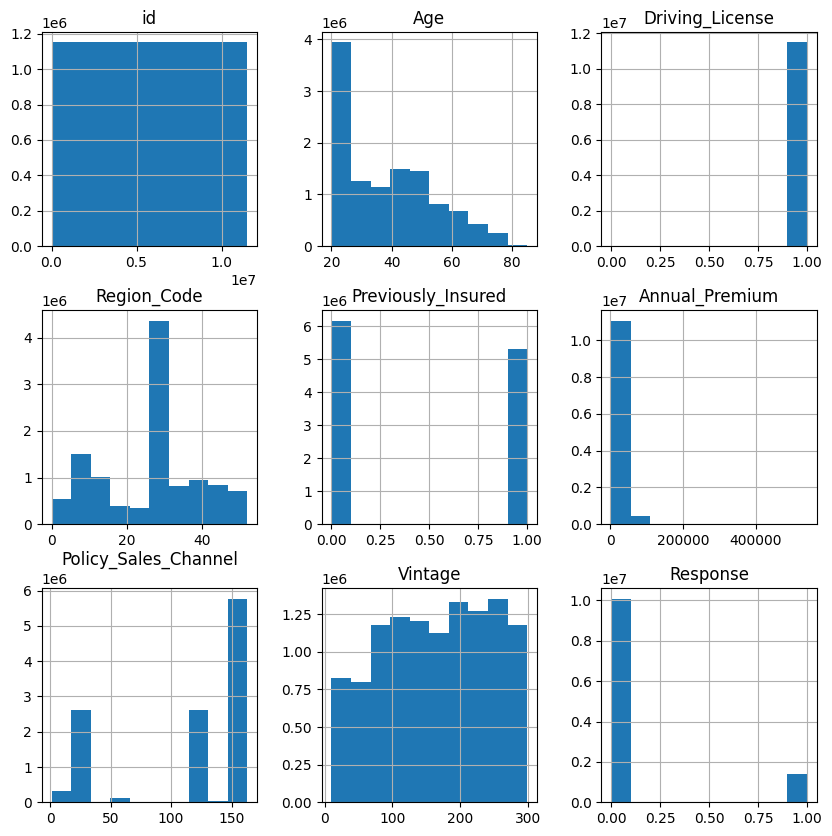

In [8]:
data.hist(figsize=(10, 10)) 

KeyboardInterrupt: 

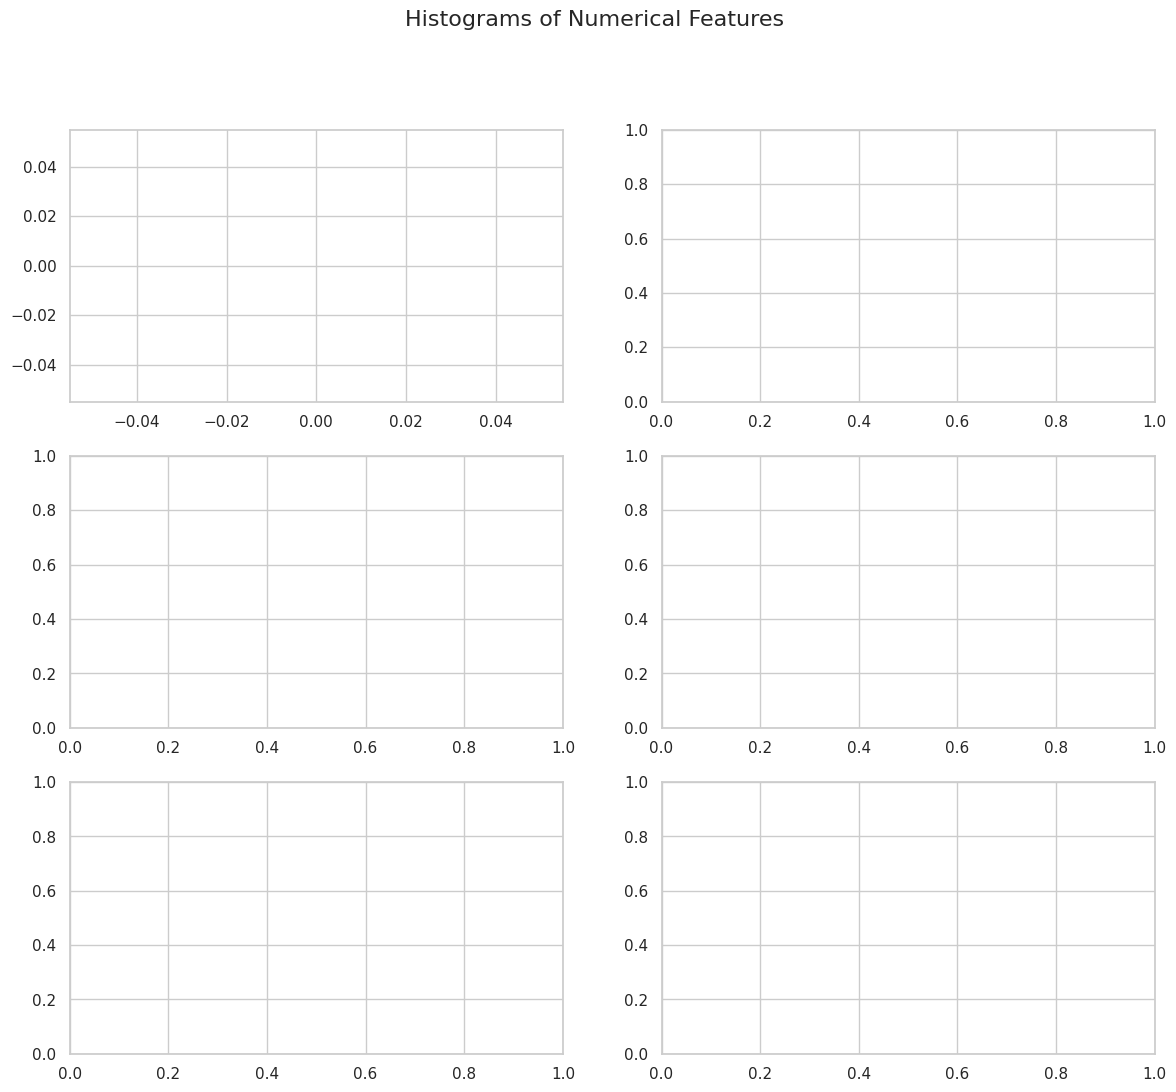

In [13]:
# 표 스타일을 설정
sns.set(style="whitegrid")

# 모든 수치형 변수에 대한 히스토그램 작성
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Histograms of Numerical Features', fontsize=16)

numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
for ax, column in zip(axes.flatten(), numerical_columns):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(column, fontsize=12)
    ax.set_xlabel('')
axes.flatten()[-1].axis('off')  # 깔끔한 표기를 위해 서브 플롯 axis('off')

# 이상치를 확인하기 위해 수치 기능을위한 BoxPlot 만들기
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Boxplots of Numerical Features', fontsize=16)

for ax, column in zip(axes.flatten(), numerical_columns):
    sns.boxplot(y=data[column], ax=ax)
    ax.set_title(column, fontsize=12)
    ax.set_ylabel('')
axes.flatten()[-1].axis('off')  # Turn off last subplot for neatness

# 범주형 변수 확인을 위한 countplot 작성
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle('Count Plots of Categorical Features', fontsize=16)

categorical_columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(x=data[column], ax=ax)
    ax.set_title(column, fontsize=12)
    ax.set_xlabel('')

# 모든 플롯을 표시합니다
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 숫자 기능에 대한 상관 관계 히트 맵 생성
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': .8})
plt.show()

## 6. Feature Engineering

## 7. SPLITTING DATA

## 8. Scaling Data

In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 범주형 및 수치형 특성 정의
categorical_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
numerical_features = ['Age', 'Region_Code', 'Policy_Sales_Channel', 'Vintage']
outlier_features = ['Annual_Premium']
target = 'Response'

# 변환기
categorical_transformer = OneHotEncoder()
numerical_transformer = StandardScaler()
outlier_transformer = RobustScaler()

# 특정 열에 변환을 적용하기 위한 열 변환기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('out', outlier_transformer, outlier_features)
    ])

# 데이터 적합 및 변환
processed_data = preprocessor.fit_transform(data)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 'data'가 원래 데이터 프레임이고 대상 변수가 'response'
X = data.drop('Response', axis=1)  # Features
y = data['Response']  # Target variable

# 전처리 (이전에 정의 된 전처리기 사용)
X_transformed = preprocessor.fit_transform(X)

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트를 예측합니다
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of the model: ", accuracy)
print("Classification Report: \n", report)


NameError: name 'preprocessor' is not defined

In [7]:
# Split data into features and target
X = data.drop(columns=[target])
y = data[target]

test = data_test[categorical_features + numerical_features]
test = pd.get_dummies(test, columns=test.columns, drop_first=True)

# Split the data into training and validation sets (if needed)
X_train, X_val, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline with the preprocessor and the classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predict on validation data
y_pred = model.predict(X_val)

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Predict on test data
y_test_pred = model.predict(test)

# Evaluate the model on test data
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

: 